In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join, exists
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir("outputs/ResAMR/embdim512_DRIAMS-B_random_sp0_results")


['architecture.txt',
 'test_metrics_1.json',
 'test_metrics_3.json',
 'test_metrics_0.json',
 'test_metrics_2.json',
 'test_metrics_4.json',
 'config.json']

In [3]:
# template = "embdim512_DRIAMS-{}_{}_sp{}_results"
template = "embdim512_DRIAMS-{}_{}_sp{}_results"

datasets = ["A", "B", "C", "D"]
splits = ["random", "partitioned"]
sp_dims = [0, 64]

In [5]:
metrics_df = []

for dset in datasets:
    for sp in splits:
        
        
        for i in range(5):
            try:
                with open(join("outputs/ResAMR", template.format(dset, sp), f"test_metrics_{i}.json"), "r") as f:
                    met = json.load(f)
                met["dataset"] = dset
                met["split"] = sp
                met["seed"]=i
                metrics_df.append(met)
            except:
                continue
    
metrics_df = pd.DataFrame(metrics_df)
metrics_df = metrics_df.drop("test_loss", axis=1)
metrics_df

,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,dataset,split,seed
0,0.706698,0.817414,0.739415,0.842607,0.855348,0.656729,B,random,0
1,0.575526,0.725445,0.593991,0.718507,0.841737,0.468534,B,random,1
2,0.707105,0.830420,0.744360,0.839588,0.821199,0.690982,B,random,2
3,0.789185,0.874428,0.818109,0.888223,0.878713,0.770437,B,random,3
4,0.457474,0.689061,0.508365,0.624445,0.666246,0.419481,B,random,4
5,0.349319,0.648676,0.426334,0.469841,0.575391,0.369701,B,partitioned,0
6,0.403820,0.672733,0.464366,0.576594,0.630944,0.399828,B,partitioned,3
7,0.687413,0.818469,0.749547,0.832833,0.843319,0.678574,C,random,0
8,0.563601,0.740184,0.630168,0.758473,0.807172,0.522096,C,random,1
9,0.596075,0.739864,0.635502,0.767824,0.891308,0.499960,C,random,2


In [6]:
metrics_df.groupby(["dataset", "split"]).mean()

test_mcc  test_balanced_accuracy   test_f1  test_AUPRC  \
dataset split                                                                 
B       partitioned  0.376570                0.660705  0.445350    0.523217   
        random       0.647198                0.787354  0.680848    0.782674   
C       partitioned  0.390263                0.677983  0.494889    0.557725   
        random       0.668777                0.801302  0.722767    0.818054   
D       partitioned  0.461943                0.704824  0.542008    0.619667   
        random       0.586573                0.767218  0.629249    0.692512   

                     test_precision  test_recall  seed  
dataset split                                           
B       partitioned        0.603168     0.384765   1.5  
        random             0.812649     0.601233   2.0  
C       partitioned        0.596591     0.448039   0.5  
        random             0.858249     0.637218   2.0  
D       partitioned        0.663044     0.478479   2.0  
        random             0.728259     0.568063   2.0

In [7]:
metrics_df.groupby(["dataset", "split"]).mean()

test_mcc  test_balanced_accuracy   test_f1  test_AUPRC  \
dataset split                                                                 
B       partitioned  0.376570                0.660705  0.445350    0.523217   
        random       0.647198                0.787354  0.680848    0.782674   
C       partitioned  0.390263                0.677983  0.494889    0.557725   
        random       0.668777                0.801302  0.722767    0.818054   
D       partitioned  0.461943                0.704824  0.542008    0.619667   
        random       0.586573                0.767218  0.629249    0.692512   

                     test_precision  test_recall  seed  
dataset split                                           
B       partitioned        0.603168     0.384765   1.5  
        random             0.812649     0.601233   2.0  
C       partitioned        0.596591     0.448039   0.5  
        random             0.858249     0.637218   2.0  
D       partitioned        0.663044     0.478479   2.0  
        random             0.728259     0.568063   2.0

In [8]:
plot_df = pd.melt(metrics_df.reset_index(), id_vars=["dataset", "split", "seed"], value_vars=[c for c in metrics_df.columns if c.startswith("test")])
plot_df

,dataset,split,seed,variable,value
0,B,random,0,test_mcc,0.706698
1,B,random,1,test_mcc,0.575526
2,B,random,2,test_mcc,0.707105
3,B,random,3,test_mcc,0.789185
4,B,random,4,test_mcc,0.457474
...,...,...,...,...,...
127,D,partitioned,0,test_recall,0.408639
128,D,partitioned,1,test_recall,0.460267
129,D,partitioned,2,test_recall,0.590479
130,D,partitioned,3,test_recall,0.542159


<AxesSubplot: xlabel='variable', ylabel='value'>

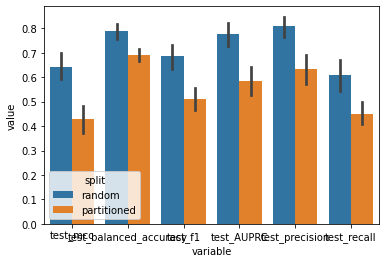

In [9]:
sns.barplot(data=plot_df, x="variable", y="value", hue="split")

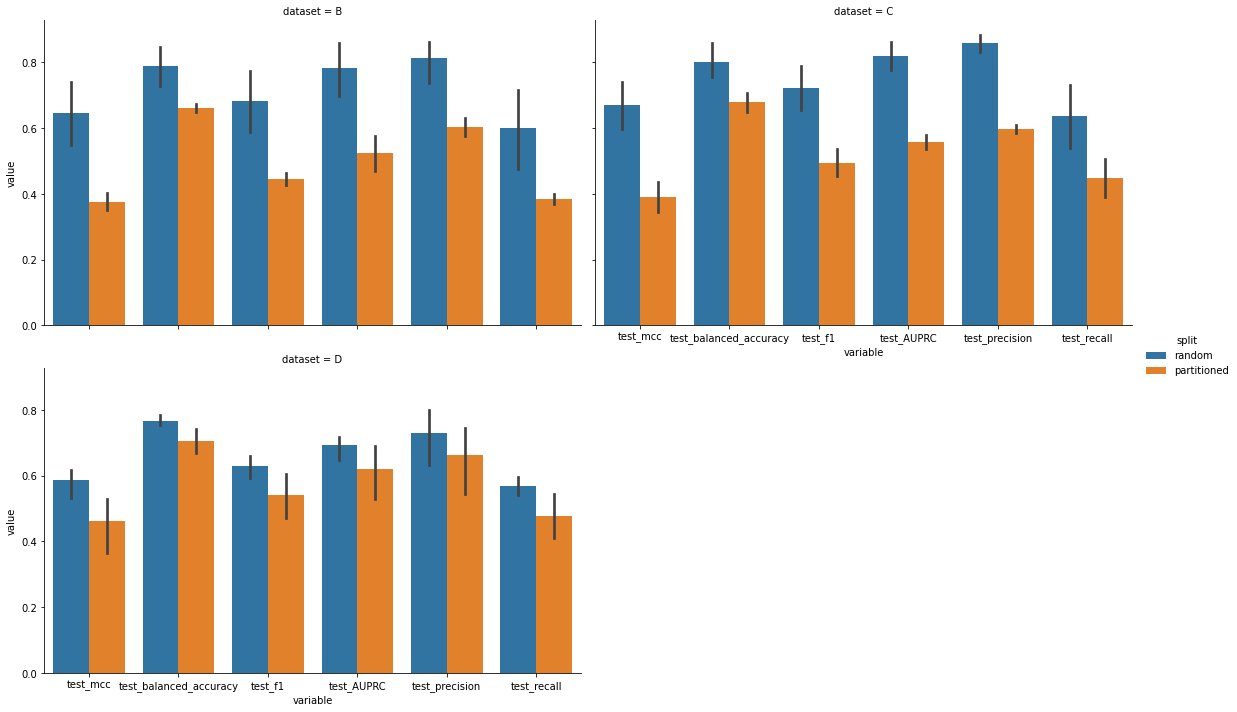

In [10]:
sns.catplot(
    data=plot_df, x="variable", y="value", hue="split", col="dataset", col_wrap=2,
    kind="bar", height=5, aspect=1.6,
)